In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

# Veriyi yükleyelim
data = pd.read_csv('train_data.csv')  # Train verisini yükleyin
val = pd.read_csv("validation_data.csv")

# Sadece sayısal sütunlara MinMaxScaler uygulayalım
data[['Alfas', 'Frenkans']] = minmax.fit_transform(data[['Alfas', 'Frenkans']])
val[['Alfas', 'Frenkans']] = minmax.transform(val[['Alfas', 'Frenkans']])

# Veriyi shuffle yapıyoruz
data = shuffle(data)

# Bağımsız ve bağımlı değişkenler
X = data[['Alfas', 'Frenkans']]  # Alfas ve Frenkans
y = data['Emilim']  # Emilim
VX = val[['Alfas', 'Frenkans']]  # Alfas ve Frenkans
Vy = val['Emilim']  

# 1. Gradient Boosting Modeli
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.2, max_depth=10000, random_state=42)
gb_model.fit(X, y)

# 2. XGBoost Modeli
xg_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.3, max_depth=200, random_state=42)
xg_model.fit(X, y)

# 3. LightGBM Modeli
lgb_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.2, max_depth=100, random_state=42)
lgb_model.fit(X, y)

# Test verisinde tahmin yapalım
y_pred_gb = gb_model.predict(VX)
y_pred_xg = xg_model.predict(VX)
y_pred_lgb = lgb_model.predict(VX)

# Performans metrikleri
print("Gradient Boosting R2:", r2_score(Vy, y_pred_gb))
print("XGBoost R2:", r2_score(Vy, y_pred_xg))
print("LightGBM R2:", r2_score(Vy, y_pred_lgb))

# Test verisini kullanarak özel bir Alfas ve Frenkans değeri için tahmin yapalım
# Örneğin, Alfas = 1.85 ve Frenkans = 10
test_data = pd.DataFrame({'Alfas': [1.85], 'Frenkans': [10]})

# Test verisini MinMaxScaler ile normalleştir
test_data = minmax.fit_transform(test_data)

pred_emilim_gb = gb_model.predict(test_data)
pred_emilim_xg = xg_model.predict(test_data)
pred_emilim_lgb = lgb_model.predict(test_data)

print("Test Edilen Alfas ve Frenkans için tahmin edilen Emilim:")
print("Gradient Boosting Emilim:", pred_emilim_gb[0])
print("XGBoost Emilim:", pred_emilim_xg[0])
print("LightGBM Emilim:", pred_emilim_lgb[0])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 282
[LightGBM] [Info] Number of data points in the train set: 27027, number of used features: 2
[LightGBM] [Info] Start training from score 0.935705
Gradient Boosting R2: -3.6933454701731403
XGBoost R2: -3.691073348583642
LightGBM R2: -3.6991644704590634
Test Edilen Alfas ve Frenkans için tahmin edilen Emilim:
Gradient Boosting Emilim: 0.8833450029181401
XGBoost Emilim: 0.88317645
LightGBM Emilim: 0.8811321180483971


c:\Users\denem\Documents\python\Karmasik\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


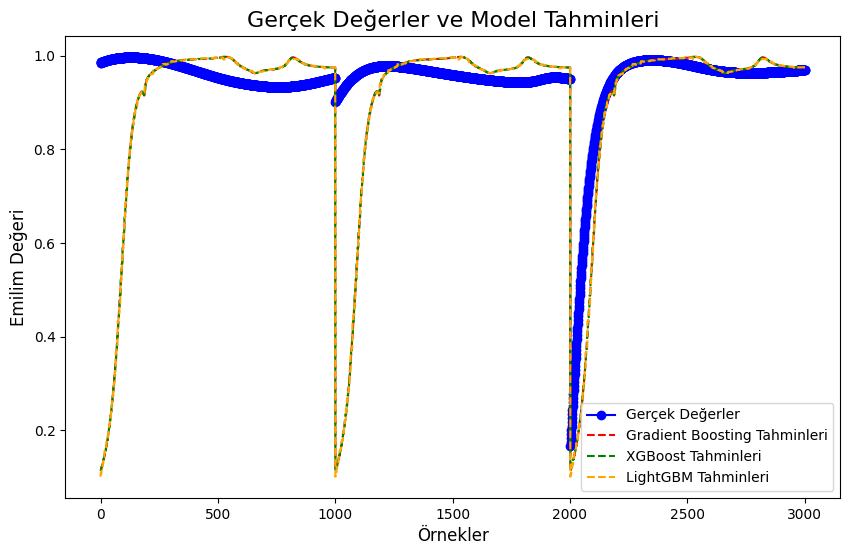

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerçek ve tahmin edilen değerler
y_true = Vy


# Grafik için x ekseni (örneğin, sıralı numaralar kullanıyoruz)
x_axis = np.arange(len(y_true))

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Gerçek değerler
plt.plot(x_axis, y_true, label="Gerçek Değerler", color='blue', linestyle='-', marker='o')

# Gradient Boosting tahminleri
plt.plot(x_axis, y_pred_gb, label="Gradient Boosting Tahminleri", color='red', linestyle='--')

# XGBoost tahminleri
plt.plot(x_axis, y_pred_xg, label="XGBoost Tahminleri", color='green', linestyle='--')

# LightGBM tahminleri
plt.plot(x_axis, y_pred_lgb, label="LightGBM Tahminleri", color='orange', linestyle='--')

# Başlık ve etiketler
plt.title("Gerçek Değerler ve Model Tahminleri", fontsize=16)
plt.xlabel("Örnekler", fontsize=12)
plt.ylabel("Emilim Değeri", fontsize=12)
plt.legend()

# Grafiği göster
plt.show()


In [ ]:
import matplotlib.pyplot as plt

selected_alfas = 1.94

filtered_test_data = df[df["Alfas"] == selected_alfas]
frenkans_values = filtered_test_data["Frenkans"]

test_data_for_selected_alfas = pd.DataFrame({'Alfas': [selected_alfas]*len(frenkans_values), 'Frenkans': frenkans_values})
predicted_emilim = model.predict(test_data_for_selected_alfas)

true_emilim_values = filtered_test_data["Emilim"]

plt.figure(figsize=(10, 6))
plt.plot(frenkans_values, true_emilim_values, label="Gerçek Emilim Değerleri", color="green", linewidth=2)# suan da burada gecek degeri gostermiyorum cunki gercek deger yok 
plt.plot(frenkans_values, predicted_emilim, label="Tahmin Edilen Emilim Değerleri", color="red", linestyle="--", linewidth=2)
plt.title(f"Alfa Değeri {selected_alfas} için Gerçek ve Tahmin Edilen Emilim", fontsize=16)
plt.xlabel("Frekans", fontsize=14)
plt.ylabel("Emilim", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
